Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=Z7xd3nD1aGU&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=3

# Clustering Data

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df=pd.read_csv('s1.txt')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.9,3.6,1.4,0.1,0
1,5.6,2.9,3.6,1.3,1
2,6.6,2.9,4.6,1.3,1
3,5.7,2.8,4.1,1.3,1
4,6.6,3.0,4.4,1.4,1


In [3]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

In [4]:
n_clusters=3
X=df[features].values
clusters = KMeans(n_clusters=n_clusters, random_state=10).fit_predict(X)

In [5]:
clusters

array([1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0], dtype=int32)

In [6]:
df['clusters']=clusters

In [7]:
df['clusters']

0      1
1      0
2      0
3      0
4      0
      ..
145    1
146    0
147    2
148    2
149    0
Name: clusters, Length: 150, dtype: int32

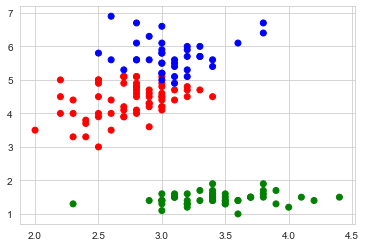

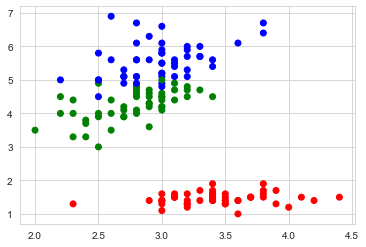

In [8]:
colors=['red','green','blue']
color_clusters=[colors[x] for x in  clusters]
color_target=[colors[x] for x in  df.target.values]
df['color_clusters']=color_clusters
_=plt.scatter(X[:, 1], X[:, 2], c=color_clusters)
plt.show()
_=plt.scatter(X[:, 1], X[:, 2], c=color_target)
plt.show()

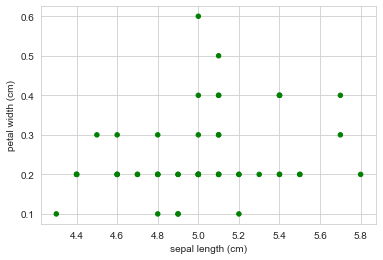

In [9]:
df_class=df[df.target==0]
_=df_class.plot.scatter(x='sepal length (cm)', y='petal width (cm)',c=df_class.color_clusters)

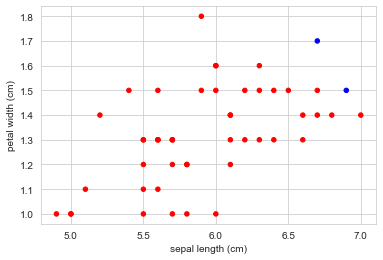

In [10]:
df_class=df[df.target==1]
_=df_class.plot.scatter(x='sepal length (cm)', y='petal width (cm)',c=df_class.color_clusters)

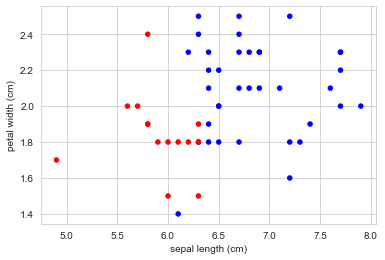

In [11]:
df_class=df[df.target==2]
_=df_class.plot.scatter(x='sepal length (cm)', y='petal width (cm)',c=df_class.color_clusters)

In [12]:
n_clusters=3
clustering = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None, linkage="ward").fit(X)
clusters_aggl=clustering.labels_

In [13]:
clusters_aggl

array([1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0])

In [14]:
df['clusters_aggl']=clusters_aggl

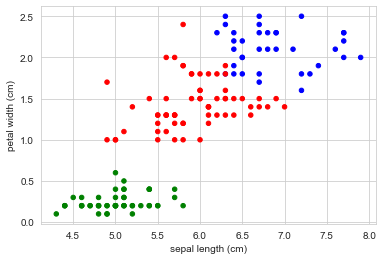

In [15]:
df['color_clusters_aggl']=[colors[x] for x in  clusters_aggl]
_=df.plot.scatter(x='sepal length (cm)', y='petal width (cm)',c=[colors[x] for x in  df['clusters_aggl']])

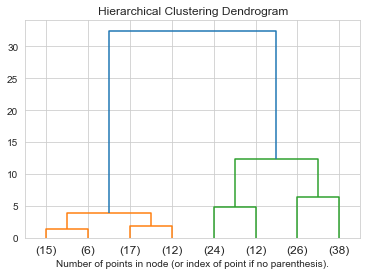

In [16]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = df[features].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [17]:
clustering = DBSCAN(eps=0.7, min_samples=15).fit(X)
df['clusters_dbscan']=clustering.labels_

In [19]:
clustering.labels_

array([ 0,  1,  1,  1,  1,  0,  0, -1,  0,  1,  0,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1,  1,  1,
       -1,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  0,  0,  0,  0, -1,  1,  1, -1,  1,  1,  0,  1,  1,
        1,  0,  0,  0,  1,  0,  0, -1,  1,  1,  1,  1,  0,  1,  0,  0,  1,
        1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,
       -1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,  0, -1,  0,  1,
        0,  1,  0,  0,  0, -1, -1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1, -1,  1,  1])

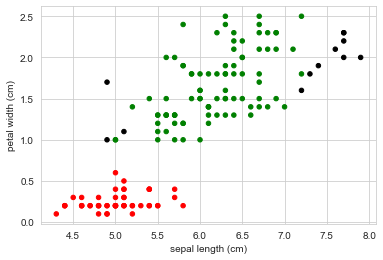

In [18]:
colors=['red','green','blue']
_=df.plot.scatter(x='sepal length (cm)', y='petal width (cm)',\
c=[colors[x] if x >=0 else 'black' for x in  df['clusters_dbscan']])

In [20]:
X = df[features].values
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [22]:
X_pca.shape

(150, 2)

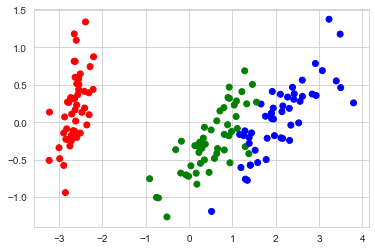

In [23]:
_=plt.scatter(X_pca[:,0],X_pca[:,1], c=[colors[x] for x in  df['target']])

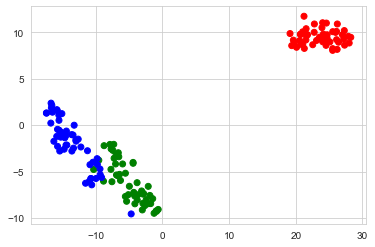

In [26]:
X_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=25).fit_transform(X)
_=plt.scatter(X_tsne[:,0],X_tsne[:,1], c=[colors[x] for x in  df['target']])